In [2]:
import os

In [3]:
data_dir = r'C:\Users\Foundation AI\Desktop\DS_Projects\brain_tumor_detection\cell_images'

In [4]:
data_dir
print(data_dir)

C:\Users\Foundation AI\Desktop\DS_Projects\brain_tumor_detection\cell_images


In [4]:
os.listdir(data_dir)

['test', 'train']

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread, imsave

In [6]:
test_path = data_dir + '\\test\\'

In [7]:
train_path = data_dir + '\\train\\'

In [8]:
test_path

'C:\\Users\\Foundation AI\\Desktop\\DS_Projects\\brain_tumor_detection\\cell_images\\test\\'

In [9]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [10]:
os.listdir(train_path+'\\parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [11]:
para_cell = train_path+'\\parasitized\\'+'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [12]:
imread(para_cell).shape

(148, 142, 3)

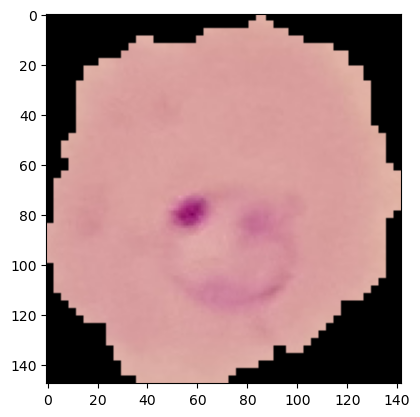

In [13]:
plt.imshow(imread(para_cell))

In [14]:
os.listdir(train_path+'\\uninfected\\')[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [15]:
uninfected_cell = train_path + '\\uninfected\\' + 'C100P61ThinF_IMG_20150918_144104_cell_128.png'

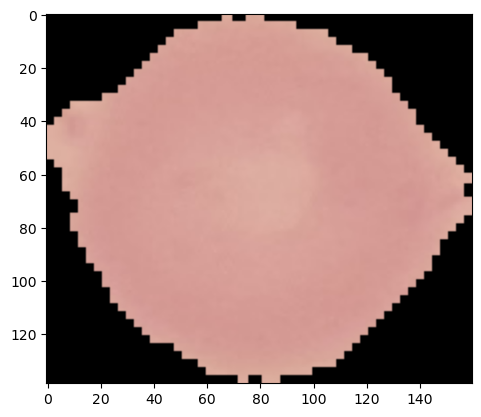

In [16]:
plt.imshow(imread(uninfected_cell))

In [17]:
len(os.listdir(train_path + '\\parasitized'))

12480

In [18]:
len(os.listdir(train_path + '\\uninfected'))

12480

In [19]:
len(os.listdir(test_path + '\\parasitized'))

1300

In [20]:
len(os.listdir(test_path + '\\uninfected'))

1300

In [21]:
# find the average shape of all the images

dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+'\\uninfected'):
    img = imread(test_path+'\\uninfected\\'+image_filename)
    d1, d2, color = img.shape
    dim1.append(d1)
    dim2.append(d2)
    

C:\Users\Foundation AI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


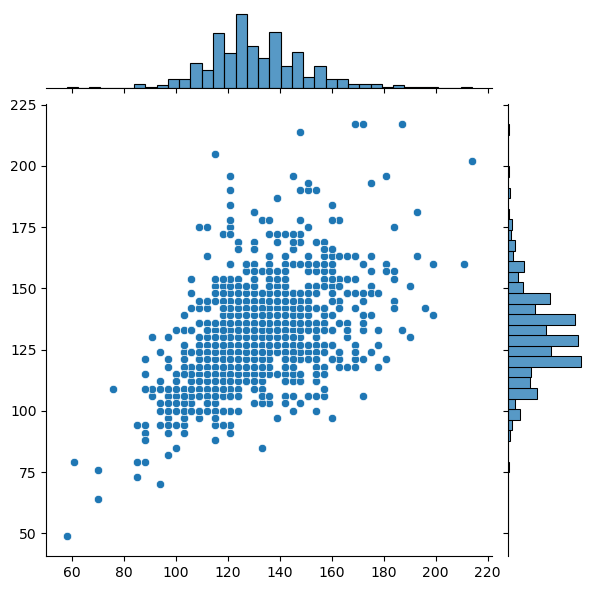

In [22]:
sns.jointplot(dim1, dim2)

In [23]:
np.mean(dim1)

130.92538461538462

In [24]:
np.mean(dim2)

130.75

In [25]:
imread(para_cell).max()

0.9098039

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
img_gen = ImageDataGenerator(rotation_range=20,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            shear_range=0.1,
                            zoom_range=0.1,
                            horizontal_flip=True,
                            fill_mode='nearest')

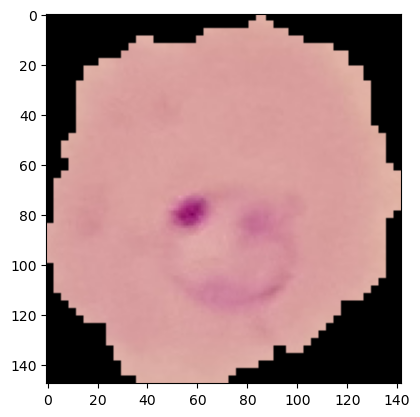

In [28]:
plt.imshow(imread(para_cell))

In [29]:
para_img = imread(para_cell)

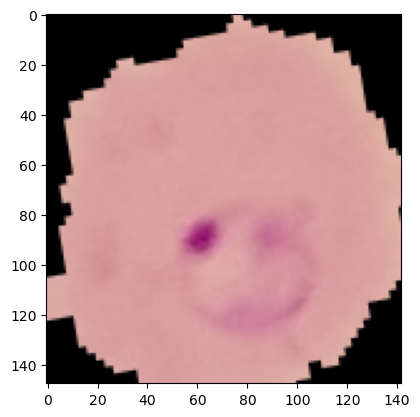

In [30]:
plt.imshow(img_gen.random_transform(para_img))

In [31]:
img_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [32]:
img_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [33]:
from tensorflow.keras.models import Sequential

In [34]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

In [35]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(130, 130, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(130, 130, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(130, 130, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(130, 130, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])





In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

In [38]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [39]:
batch_size = 16

In [40]:
train_img_gen = img_gen.flow_from_directory(train_path,
                                            target_size=(130, 130),
                                            color_mode='rgb',
                                            batch_size=batch_size,
                                            class_mode='binary')


Found 24958 images belonging to 2 classes.


In [41]:
test_img_gen = img_gen.flow_from_directory(test_path,
                                            target_size=(130, 130),
                                            color_mode='rgb',
                                            batch_size=batch_size,
                                            class_mode='binary',
                                            shuffle=False)


Found 2600 images belonging to 2 classes.


In [42]:
train_img_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [43]:
result = model.fit_generator(generator=train_img_gen,
                            epochs=5,
                            callbacks=[early_stop])

Epoch 1/5


C:\Users\Foundation AI\AppData\Local\Temp\ipykernel_6900\108531075.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  result = model.fit_generator(generator=train_img_gen,


1560/1560 [==============================] - 285s 183ms/step - loss: 0.4153 - accuracy: 0.8397
Epoch 2/5
1560/1560 [==============================] - 291s 187ms/step - loss: 0.1888 - accuracy: 0.9427
Epoch 3/5
1560/1560 [==============================] - 309s 198ms/step - loss: 0.1781 - accuracy: 0.9455
Epoch 4/5
1560/1560 [==============================] - 432s 277ms/step - loss: 0.1706 - accuracy: 0.9481
Epoch 5/5
1560/1560 [==============================] - 2110s 1s/step - loss: 0.1706 - accuracy: 0.9472


In [43]:
from tensorflow.keras.models import load_model

In [44]:
my_model = load_model('malerial_infection_detection_model.h5')

In [45]:
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0

In [46]:
my_model.evaluate_generator(test_img_gen)

C:\Users\Foundation AI\AppData\Local\Temp\ipykernel_20632\1209114814.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  my_model.evaluate_generator(test_img_gen)


[0.16939832270145416, 0.9480769038200378]

In [47]:
my_model.metrics_names

['loss', 'accuracy']

In [48]:
pred = my_model.predict_generator(test_img_gen)

C:\Users\Foundation AI\AppData\Local\Temp\ipykernel_20632\2653225566.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred = my_model.predict_generator(test_img_gen)


In [122]:
pred

array([[1.5852749e-03],
       [6.6462159e-04],
       [4.3780456e-06],
       ...,
       [9.5221490e-01],
       [9.6931201e-01],
       [9.4746792e-01]], dtype=float32)

In [124]:
predictions = pred > 0.6

In [125]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [126]:
from sklearn.metrics import confusion_matrix, classification_report

In [127]:
print(classification_report(test_img_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1300
           1       0.94      0.94      0.94      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



In [128]:
confusion_matrix(test_img_gen.classes, predictions)

array([[1224,   76],
       [  77, 1223]], dtype=int64)

In [129]:
from tensorflow.keras.preprocessing import image

In [130]:
my_img = image.load_img(para_cell, target_size=(130, 130, 3))

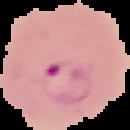

In [131]:
my_img

In [132]:
my_img_arr = image.img_to_array(my_img)

In [133]:
my_img_arr = np.expand_dims(my_img_arr, axis=0)

In [134]:
my_img_arr.shape

(1, 130, 130, 3)

In [135]:
my_model.predict(my_img_arr)

array([[0.00092116]], dtype=float32)

In [136]:
train_img_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [137]:
uninfected_img = image.load_img(uninfected_cell, target_size=(130, 130, 3))

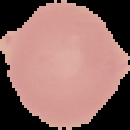

In [138]:
uninfected_img

In [139]:
uninfected_img_arr = image.img_to_array(uninfected_img)

In [140]:
uninfected_img_arr = np.expand_dims(uninfected_img_arr, axis=0)

In [141]:
my_model.predict(uninfected_img_arr)

array([[0.98176014]], dtype=float32)